# <center style='color:sienna'>`Complement Naive Bayes` using Scikit-Learn</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics 

# 2. Load `ham_spam` dataset

In [2]:
df = pd.read_csv('ham_spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# 3. Drop unnecessary columns

In [5]:
new_df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
new_df.shape

(5572, 2)

In [7]:
new_df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
new_df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

# 4. Apply preprocessing

In [9]:
labelencoder = LabelEncoder()
new_df['target'] = labelencoder.fit_transform(df['v1'])
new_df.head()

,v1,v2,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
new_df['target'].unique()

array([0, 1])

In [11]:
new_df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

# 5. Separate features and labels

In [12]:
X = new_df['v2']
y = new_df['target']

# 6. Split the dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4457, 1115, 4457, 1115)

# 7. Apply `Vectorization` and `Complement Naive Bayes`

In [15]:
clf = Pipeline([
    ('cv', CountVectorizer()),
    ('cnb', ComplementNB())
])

In [16]:
clf.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('cnb', ComplementNB())])

In [17]:
print('Accuracy on the train set:', round(clf.score(X_train, y_train), 4))
print('Accuracy on the test set:', round(clf.score(X_test, y_test), 4))

Accuracy on the train set: 0.9865
Accuracy on the test set: 0.9767


# 8. Plot `confusion_matrix`

In [18]:
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=clf.classes_)

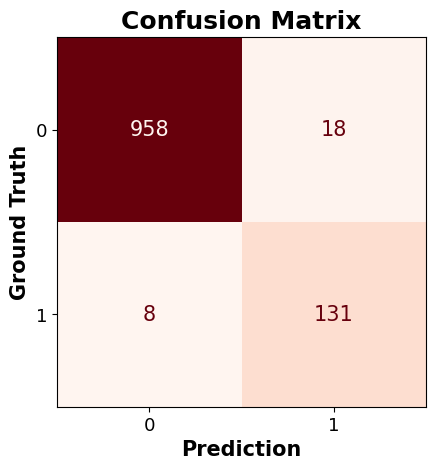

In [19]:
disp.plot(cmap='Reds', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [20]:
cat_labels = ['ham', 'spam']
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

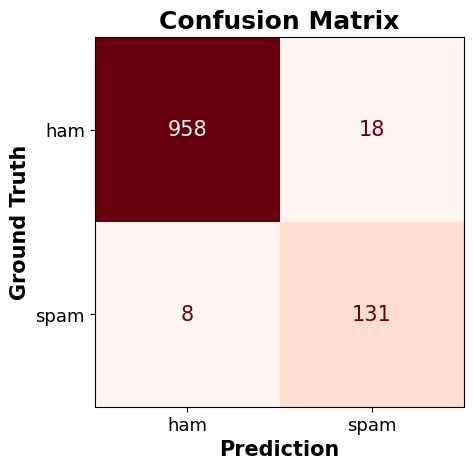

In [21]:
disp.plot(cmap='Reds', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [22]:
print('F1 score:', round(metrics.f1_score(y_test, y_pred), 4))
print('Jaccard score:', round(metrics.jaccard_score(y_test, y_pred), 4))

F1 score: 0.9097
Jaccard score: 0.8344


# 9. Print `classification_report`

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       976
           1       0.88      0.94      0.91       139

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

